In [6]:
import pandas as pd
df=pd.read_csv('Crude Oil WTI Futures Historical Data.csv')
df.rename(columns={'Price':'Close'}, inplace=True)
look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
            '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
look_up = {v: k for k, v in look_up.items()}
df['Month'] = df['Date'].apply(lambda x: look_up[x[:3]])
df['Date']= df['Date'].str[-4:]+df['Month']+df['Date'].str[4:6]
df=df.iloc[::-1]
df['High']=df['High'].astype(float)
df['Close']=df['Close'].astype(float)
df['Open']=df['Open'].astype(float)
df['Low']=df['Low'].astype(float)
df.reset_index(drop=True, inplace=True)
df.Date = pd.to_datetime(df['Date'], format='%Y%m%d')
# df.set_index(['Date'],inplace=True)


df.head()

,Date,Close,Open,High,Low,Vol.,Change %,Month
0,2017-10-17,51.88,51.93,52.25,51.21,471.61K,0.02%,10
1,2017-10-18,52.04,51.94,52.33,51.69,152.62K,0.31%,10
2,2017-10-19,51.29,52.05,52.17,51.07,127.41K,-1.44%,10
3,2017-10-20,51.47,51.42,51.73,50.70,32.96K,0.35%,10
4,2017-10-23,51.90,52.07,52.30,51.68,583.56K,0.84%,10


In [7]:
def exponential_moving_average(data, n):
    alpha = 2 / (1 + n)

    PDM = [0]
    NDM = [0]
    i = 1
    while i <= data.index[-1]:
        if (data['High'].iloc[i] - data['High'].iloc[i - 1]) > (data['Low'].iloc[i - 1] - data['Low'].iloc[i]):
            PDM.append(max(0, data['High'].iloc[i] - data['High'].iloc[i - 1]))
        else:
            PDM.append(0)

        if (data['High'].iloc[i] - data['High'].iloc[i - 1]) < (data['Low'].iloc[i - 1] - data['Low'].iloc[i]):
            NDM.append(max(0, data['Low'].iloc[i - 1] - data['Low'].iloc[i]))
        else:
            NDM.append(0)

        i = i + 1

    i = (n - 1)
    EMA = [0] * (n - 1)
    while i <= data.index[-1]:
        if i == (n - 1):
            EMA.append(sum(data['Close'].iloc[i - n + 1:i + 1]) / n)
        else:
            EMA.append(data['Close'].iloc[i] * alpha + EMA[i - 1] * (1 - alpha))

        i = i + 1
    EMA = pd.Series(EMA, name='EMA_' + str(n))
    return EMA

EMA_26 = exponential_moving_average(df, 26)
EMA_50 = exponential_moving_average(df, 50)
df['EMA_26'] = round(EMA_26, 1)
df['EMA_50'] = round(EMA_50, 1)

In [8]:
df.head()

,Date,Close,Open,High,Low,Vol.,Change %,Month,EMA_26,EMA_50
0,2017-10-17,51.88,51.93,52.25,51.21,471.61K,0.02%,10,0.0,0.0
1,2017-10-18,52.04,51.94,52.33,51.69,152.62K,0.31%,10,0.0,0.0
2,2017-10-19,51.29,52.05,52.17,51.07,127.41K,-1.44%,10,0.0,0.0
3,2017-10-20,51.47,51.42,51.73,50.70,32.96K,0.35%,10,0.0,0.0
4,2017-10-23,51.90,52.07,52.30,51.68,583.56K,0.84%,10,0.0,0.0


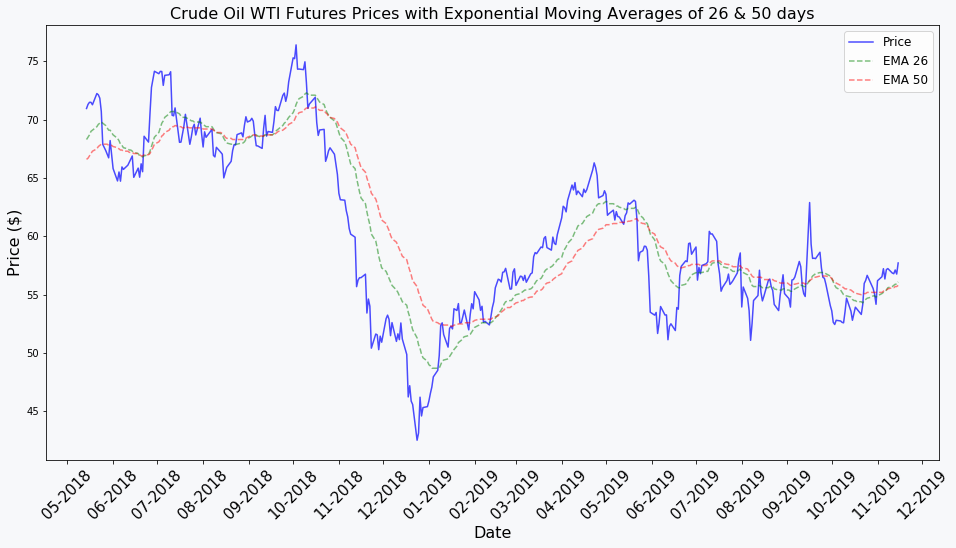

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

plotcolor='#f7f8fa'
fig, ax = plt.subplots(figsize=(16,8),facecolor=plotcolor)

ax.set_facecolor(plotcolor)
ax.plot(df['Date'].iloc[150:],df['Close'].iloc[150:], color='blue', alpha=0.7 )
ax.plot(df['Date'].iloc[150:],df['EMA_26'].iloc[150:], color='green', alpha=0.5, linestyle='--' )
ax.plot(df['Date'].iloc[150:],df['EMA_50'].iloc[150:], color='red', alpha=0.5, linestyle='--' )

ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Price ($)', fontsize=16)
ax.set_title('Crude Oil WTI Futures Prices with Exponential Moving Averages of 26 & 50 days', fontsize=16)
ax.legend(['Price','EMA 26','EMA 50'],fontsize=12)

months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)
formatter = mdates.DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, fontsize=15 )
plt.show()
fig.savefig('temp.jpg')
plt.show()
